#**PYTHON PROJECT: HIRING EFFICIENCY ANALYSIS OF JOB POSTINGS ON LINKEDIN**

LinkedIn is the world’s largest professional network, bringing together millions of job seekers, recruiters, and employers across industries. As the platform continues to scale, LinkedIn wants to go beyond increasing the number of job listings. The **new focus is on improving** **Hiring Efficiency**, helping employers attract suitable candidates faster, with the right mix of salary, role clarity, and visibility. The team has identified H**iring Efficiency as a key business metric**. It reflects how effectively a job post converts visibility into actual applicant interest, given its title, location, company size, and compensation.
Large dataset is scraped from Linkedin to provide insights on how to improve hiring efficiency of recruiters posting on Linkedin

#**QUESTION**

How to improve Hiring Efficiency of the recruiters/recruiting company based on their job posts, and help LinkedIn enhance the recruiter success rates, candidate satisfaction, and overall platform engagement.

#**Source**:

Nextleap and LinkedIn.
The data set was sent to me via google drive and it was downloaded from google drive and added to "data"

#**KEY OBJECTIVES**

1.	Define and deconstruct Hiring Efficiency as a metric across key dimensions like title, salary, industry, company size, seniority, and location.
2.	Identify which dimensions like roles or locations attract the highest and lowest applicant efficiency.
3.	Analyze relationships between the dimensions like salary, seniority level, and number of applicants to find optimal ranges for faster hiring.
4.	Evaluate how organization type, benefits, or employment type impact applicant volume and efficiency.
5.	Present actionable insights that can help recruiters design better job postings

#Downloading the data

In [3]:
%pip install gdown
import gdown
import pandas as pd
file_id = "1eHwjSb73Ut737L8rR3fEVkkhSjKWItL1"
download_url = f"https://drive.google.com/uc?id={file_id}"
output_file = "linkedin_dataset.csv"
gdown.download(download_url, output_file, quiet = False)
data = pd.read_csv(output_file)

Downloading...
From (original): https://drive.google.com/uc?id=1eHwjSb73Ut737L8rR3fEVkkhSjKWItL1
From (redirected): https://drive.google.com/uc?id=1eHwjSb73Ut737L8rR3fEVkkhSjKWItL1&confirm=t&uuid=51bf0204-4535-405d-b4a0-237aab2cda83
To: /content/linkedin_dataset.csv
100%|██████████| 517M/517M [00:07<00:00, 72.7MB/s]


#**The steps performed:**
1. data cleaning
2. data pre processing
3. Exploratory data analysis (EDA)
4. statistical analysis
5. buisness insights

#**Data Cleaning**

1.   view the data
2.   remove duplicates
3. check for missing values.
4. dealing with missing values.
5. check for outliers
6. visualise to see the outlers
7. deal with outliers if it is high

#1. **view the data**

i) the **data description** gives the central tendency of the numeric value.

ii) **data.info()** gives the data tyoes, number of values present in the data.

iii) **data.head(10)** gives the first 10 rows of the data to see how the data looks

In [4]:
#i) data description
data.describe()
#ii) information about the cols and rows and the data types
data.info()
#iii) viewing the data
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
5,91700727,Downtown Raleigh Alliance,Economic Development and Planning Intern,Job summary:The Economic Development & Plannin...,20.0,HOURLY,"Raleigh, NC",1481176.0,9.0,NaN,...,NaN,1.713456e+12,NaN,0,INTERNSHIP,USD,BASE_SALARY,35360.0,27601.0,37183.0
6,103254301,Raw Cereal,Producer,Company DescriptionRaw Cereal is a creative de...,300000.0,YEARLY,United States,81942316.0,7.0,NaN,...,NaN,1.712861e+12,NaN,0,CONTRACT,USD,BASE_SALARY,180000.0,NaN,NaN
7,112576855,NaN,Building Engineer,Summary: Due to the pending retirement of our ...,120000.0,YEARLY,"San Francisco, CA",NaN,2.0,NaN,...,NaN,1.712443e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,105000.0,94101.0,6075.0
8,1218575,Children's Nebraska,Respiratory Therapist,"At Children’s, the region’s only full-service ...",NaN,NaN,"Omaha, NE",721189.0,3.0,NaN,...,• Requires the ability to communicate effectiv...,1.712348e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,68102.0,31055.0
9,2264355,Bay West Church,Worship Leader,It is an exciting time to be a part of our chu...,NaN,MONTHLY,"Palm Bay, FL",28631247.0,5.0,350.0,...,"Knowledge, Skills and Abilities: 1. Proficient...",1.712456e+12,NaN,0,PART_TIME,USD,BASE_SALARY,4200.0,32905.0,12009.0


#2. **remove duplicates**

removing the duplicates is ideal step in data analysis. the duplicate data was removed using using data.drop_duplicates()

In [5]:
data = data.drop_duplicates()

#3. **check for missing values**

missing values in data was analysed using **.isnull()** function.

In [6]:
#checking for missing values
data.isnull().sum()

,0
job_id,0
company_name,1719
title,0
description,7
max_salary,94056
pay_period,87776
location,0
company_id,1717
views,1689
med_salary,117569


missing percentage is calculated by getting the percentage of mean of the missing data. This helps to identify, how much data was missing in the data

In [7]:
#missing_percentage
missing_percentage = (data.isnull().mean())*100
print(missing_percentage)

job_id                         0.000000
company_name                   1.387981
title                          0.000000
description                    0.005652
max_salary                    75.944093
pay_period                    70.873402
location                       0.000000
company_id                     1.386366
views                          1.363757
med_salary                    94.929309
min_salary                    75.944093
formatted_work_type            0.000000
applies                       81.170619
original_listed_time           0.000000
remote_allowed                87.689848
job_posting_url                0.000000
application_url               29.604599
application_type               0.000000
expiry                         0.000000
closed_time                   99.133622
formatted_experience_level    23.745852
skills_desc                   98.030666
listed_time                    0.000000
posting_domain                32.271556
sponsored                      0.000000


#4. **dealing with missing values.**

1. company_name and description missingness is harmless because it's <5%, it is filled with unknown.

In [8]:
#it is filled with unknown
data.fillna({"company_name":"unknown"}, inplace = True)
data.fillna({"description":"unknown"}, inplace = True)

2. pay period has more than 50% of missing data, so imputing won't be a best option neither droping that so, fill it with unknown and keep it asside for further analysis.

In [9]:
#fill it with unknown and keep it asside for further analysis
data.fillna({"pay_period":"unknown"}, inplace = True)

3. salaries has more than 50% of missing data, so imputing won't be a best option neither droping that so,leave tha NaN as it is for further analysis.

4. compensation_type, currency has more than 50% of missing data, so imputing won't be a best option neither droping that so,fill it with unknown and keep it asside for further analysis.

In [10]:
#fill it with unknown and keep it asside for further analysis

data.fillna({"currency":"unknown"}, inplace = True)
data.fillna({"compensation_type":"unknown"}, inplace = True)

5. formatted_experience_level has more than 20% of missing data, so imputing won't be a best option neither droping that so,fill it with unknown and keep it asside for further analysis

In [11]:
#fill it with unknown and keep it asside for further analysis
data.fillna({"formatted_experience_level":"unknown"}, inplace = True)

6. application_url has more than 20% of missing data, so imputing won't be a best option neither droping that so,fill it with unknown and keep it asside for further analysis.

In [12]:
#fill it with unknown and keep it asside for further analysis
data.fillna({"application_url":"unknown"}, inplace = True)


7. views has less than 5% of missing data, so imputing with median because mean will include max values and cause heavy outliers.

In [13]:
# imputing with median because mean will include max values and cause heavy outliers
data["views"] = data["views"].fillna(data["views"].median())

**droping columns that are not required**

1. med_salary isn't imputed here, it has more than 90% missing values so droping them would be a best option, since it's of no use

In [14]:
data.drop(columns= ["med_salary"]).copy()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,min_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,17.0,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,unknown,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,30.0,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,45000.0,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,140000.0,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,unknown,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,60000.0,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,120000.0,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,unknown,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,unknown,unknown,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,unknown,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,unknown,unknown,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,unknown,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,unknown,unknown,NaN,NaN,NaN


5 closing isn't imputed here, it has more than 90% missing values so droping them would be a best option, since it's of no use.

missing -> it cannot relaiaby indicate the status of the job

In [15]:
data.drop(columns= ["closed_time"], inplace = True)

3. skill_desc isn't imputed here, it has more than 90% missing values so droping them would be a best option, since it's of no use.
missing -> because most of the companies will mention the skill requirements inside the description and 98% missingness doesn't reveal anything so droping them.

In [16]:
data.drop(columns= ["skills_desc"], inplace = True)

#do not run again as the cols are droped

checking missing percentage after dealing with missing values

In [17]:
missing_percentage2 = (data.isnull().mean())*100
print(missing_percentage2)

job_id                         0.000000
company_name                   0.000000
title                          0.000000
description                    0.000000
max_salary                    75.944093
pay_period                     0.000000
location                       0.000000
company_id                     1.386366
views                          0.000000
med_salary                    94.929309
min_salary                    75.944093
formatted_work_type            0.000000
applies                       81.170619
original_listed_time           0.000000
remote_allowed                87.689848
job_posting_url                0.000000
application_url                0.000000
application_type               0.000000
expiry                         0.000000
formatted_experience_level     0.000000
listed_time                    0.000000
posting_domain                32.271556
sponsored                      0.000000
work_type                      0.000000
currency                       0.000000


#5. **outlier analysis: checking for outliers using IQR method**

required numerical columns are segregated from the data

In [18]:
#outiers analysis

data.describe()
#required numerical columns are segregated from the data
num_data = data[["max_salary","views", "min_salary",
                 "normalized_salary"]]

using inter quantile method to identify outlier counts in numerical data by using for loop function

In [19]:
for cols in num_data:
    q1= num_data[cols].quantile(0.25)
    iqr= num_data[cols].quantile(0.50)
    q3= num_data[cols].quantile(0.50)
    lower_bound= q1 - 1.5 *iqr
    upper_bound= q3 + 1.5 *iqr
    outlier_count = ((num_data[cols]<lower_bound) | (num_data[cols]>upper_bound)).sum()
    print(f" {cols} : {outlier_count} outliers")

 max_salary : 2739 outliers
 views : 22830 outliers
 min_salary : 2035 outliers
 normalized_salary : 1664 outliers


applies has more than 70% missing values which are not random so, cleaning applies data first, and analysing outliers would be an ideal option

 applies_clean : 4086 outliers


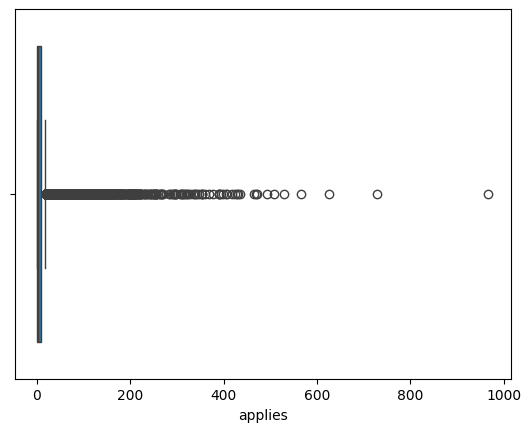

In [20]:

applies_clean = data["applies"].dropna()
q1= applies_clean.quantile(0.25)
iqr= applies_clean.quantile(0.50)
q3= applies_clean.quantile(0.75)
lower_bound= q1 - 1.5 *iqr
upper_bound= q3 + 1.5 *iqr
outlier_count = ((applies_clean<lower_bound) | (applies_clean>upper_bound)).sum()
print(f" applies_clean : {outlier_count} outliers")
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x= applies_clean)
plt.show()

#6. **visualisation of outliers**

assigning the raw data to raw filtering the required numeric columns "max_salary","views", "min_salary", "normalized_salary" to num_cols and using for loop, boxplot is formed fir each numeric variable in num_cols

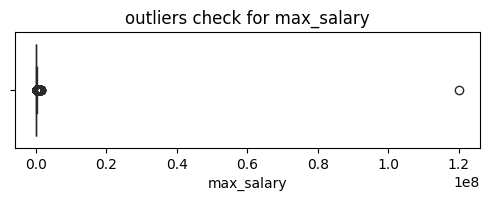

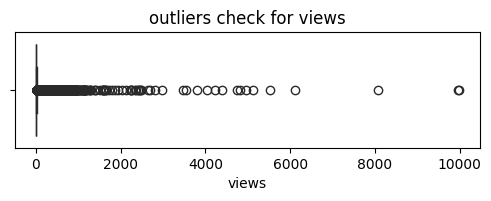

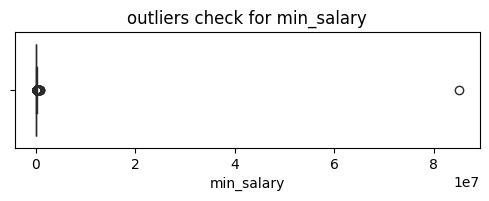

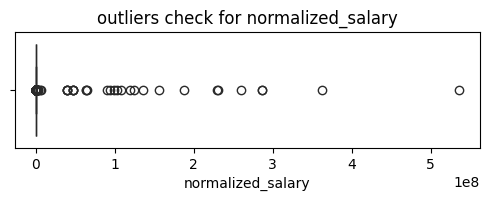

In [21]:
raw = pd.read_csv(output_file)
num_cols = raw[["max_salary","views", "min_salary",
                 "normalized_salary"]]
for cols in num_cols:
    plt.figure(figsize = (6,1.5))
    sns.boxplot(x= num_cols[cols].dropna(), color = "darkblue")
    plt.title(f"outliers check for {cols}")
    plt.show()

#7. **dealing with outliers**

outliers removal for salaries. Salaries had NaN, so the outlier removal will also remove them. To avoid that keeping NaNs aside and droping the outliers

In [22]:

nums_cols = data[["max_salary", "min_salary",
                 "normalized_salary"]]
def iqr_method(series):
    series = pd.to_numeric(series, errors= "coerce")
    q1= series.dropna().quantile(0.25)
    q3= series.dropna().quantile(0.75)
    iqr= q3-q1
    lower_bound= q1 - 1.5 *iqr
    upper_bound= q3 + 1.5 *iqr
    outliers = ((series<lower_bound) | (series>upper_bound)) & series.notna()
    outlier_count= outliers.sum()
    return lower_bound, upper_bound, outlier_count
for cols in nums_cols.columns:
    lower, upper, outlier = iqr_method(data[cols])
    print(f"outlier count of {cols}:{outlier}")
    data= data[(data[cols].between(lower,upper))|(data[cols].isna())]
nums_cols = data[["max_salary","views", "min_salary",
                 "normalized_salary"]]



outlier count of max_salary:364
outlier count of min_salary:99
outlier count of normalized_salary:574


views and applies outliers kept as it is because it is common to have extreme values for those it is kept as it is checking whether the outliers are removed

check the outliers after removal

In [23]:
lb, ub, out = iqr_method(data["normalized_salary"])
print("normal_salary:", out)

normal_salary: 144


#**processing the data and adding additional columns for data analysis**

1. flaging remote allowance in a new variable called remote status
2. time format is unreadable so changing it to readable formata and forming new labels like months and seasons.
3. disintegerating location into states_and_countries and cities, making it easier to analyse
4. adding new colums for better analysis like salary range,

1. **flaging remote allowance in a new variable called remote status**

The remote_allowed contains 0 and 1 and lot of missing values. To make it easier to analyse, A new variable remote_status was created with: Missing values were labelled as “unknown”, 1 as allowed and 0 as not allowed.

flaging remote allowance in a new variable called remote status, by usin .replace() function

In [24]:
data["remote_allowed"] = data["remote_allowed"].fillna("Unknown")
data["remote_status"]= data["remote_allowed"].replace({
    1: "Available",
    0: "Not Available",
    "NaN": "Unknown"
})
data["remote_status"].value_counts()

,count
remote_status,
Unknown,107772
Available,15040


2. **time format is unreadable so changing it to readable formata and forming new labels like months and seasons.**

time format is unreadable so changing it to readable formata and formingnew labels like months and seasons.

using to_datetime function changing the time format

In [25]:
#original_listed_time
data["original_listed_time"] = pd.to_datetime(data["original_listed_time"], unit = "ms")
data["original_listed_time"].head(10)

#expiry
data["expiry"] = pd.to_datetime(data["expiry"], unit = "ms")
data["expiry"].head(10)

#listed_time
data["listed_time"] = pd.to_datetime(data["listed_time"], unit = "ms")
data["listed_time"].head(10)

,listed_time
0,2024-04-17 23:45:08
1,2024-04-11 17:51:27
2,2024-04-16 14:26:54
3,2024-04-12 04:23:32
4,2024-04-18 14:52:23
5,2024-04-18 16:01:39
6,2024-04-11 18:43:39
7,2024-04-06 22:44:12
8,2024-04-05 20:21:40
9,2024-04-07 02:12:35


extrating months from the date to form months

In [26]:
#months
data["month"]= data["original_listed_time"].dt.month_name()
mont= data["month"].astype("category").value_counts()

from month: forming a new col called seasons (us based)

In [27]:
#seasons according to U.S
def get_season(month):
    if month in ["December", "January", "February"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    else:
        return "Fall"
data["Seasons"] = data["month"].apply(get_season)
seas = data["Seasons"].astype("category").value_counts()

check for months and seasons column

In [28]:
print(seas)
print(mont)

Seasons
Spring    122793
Winter        19
Name: count, dtype: int64
month
April       121011
March         1782
February         9
January          7
December         3
Name: count, dtype: int64


3. **disintegerating location into states_and_countries and cities, making it easier to analyse**

Disintegerating location into states_and_countries and cities, making it easier to analyse
Job location originally came as long strings (e.g., New York City Metropolitan Area). A cleaned version of the location was created by removing terms like Metropolitan Area, Bay, Area, region, urban..etc. The cleaned version is then split into 2 fields, states_and_countries and cities. Miss spellings and unwanted spaces ere then removed from those variables. Inconsistent values like Michigan were then converted to standard two letter code like MI


removing unnecessary wordings in the regions in location clean

In [29]:
data["location_clean"] = (
    data["location"].str.replace(
    "Metropolitan Area", "", regex = False).str.replace(
    "Bay", "", regex= False).str.replace(
    "Area","", regex = False).str.replace(
    " Region","", regex = False).str.replace(
    "Urban","", regex = False).str.replace(
    "-Fort Lauderdale","", regex= False).str.replace(
    ", United States","",regex = False).str.replace(
    "  ", " ", regex = False).str.strip()
)

formong new cols called cities and, states_or_countries

In [30]:
data[["cities","states_or_countries"]] = data["location_clean"].str.split(",",n=1, expand = True)
#checking cities
data["cities"].astype("category").value_counts()

,count
cities,
United States,8017
New York,3285
Chicago,1814
Houston,1764
Atlanta,1599
...,...
Yorba Linda,1
Greater Terre Haute,1
Greenford,1


united states doesnt have comma so it came in cities, so i have added that to states_or_countries using .loc() function.

I labled unknown for United States in cities and United States as United States in states_or_countries

In [31]:
mask = data["location_clean"] == "United States"
data.loc[mask, "cities"] = "unknown"
data.loc[mask, "states_or_countries"] = "USA"
data["cities"].astype("category").value_counts()
data["states_or_countries"].astype("category").value_counts()

,count
states_or_countries,
CA,11220
TX,10232
USA,8017
NY,5924
FL,5888
...,...
South Dakota,2
"South Holland, Netherlands",1
QC,1


cities and states have some errors like, in states mostly it is NY but some are abbreviated.

finding letter counts, which wil helped me to find states (not abbreviated) with more than 3 letters and changing it into an acronym form

In [32]:
data["state_letter_count"]= data["states_or_countries"].str.strip().str.len()
data["state_letter_count"].astype("category").value_counts()
data[data["state_letter_count"]>3]["states_or_countries"].unique()
#replacing the states with more than 3 letter counts to accronym form
data["states_or_countries"] = data["states_or_countries"].replace({
    'Missouri': "MO",
    'Nevada': "NV",
    'Tennessee': "TN",
    'SouthDakota': "SD",
    'DistrictofColumbia': "DC",
    'Pennsylvania': "PA",
    'Maryland': "MD",
    'Alaska': "AK",
    'Michigan': "MI",
    'Arkansas': "AR",
    'Minnesota': "MN",
    'NewMexico': "NM",
    'SouthHollandNetherlands': "NLD",   # country
    'TheGambia': "GMB"                  # country
})

removing uneven and extra spaces

In [33]:
data["states_or_countries"] = data["states_or_countries"].str.strip()
data["states_or_countries"] = data["states_or_countries"].str.replace("\u00A0","") #removing non breaking spaces
data["states_or_countries"] = data["states_or_countries"].str.replace(" ","") #removing extra spaces
data["states_or_countries"] = data["states_or_countries"].str.replace(r"\s+","", regex= True) #removing white spaces
data["state_letter_count"] = data["states_or_countries"].str.len()
data[data["state_letter_count"] > 3]["states_or_countries"].unique()


array(['Nebraska', 'Ohio', 'SouthCarolina', 'Texas', 'California',
       'Oregon', 'Illinois', 'Alabama', 'Kansas', 'Massachusetts',
       'Wisconsin', 'Missouri', 'NewYork', 'Virginia', 'Colorado',
       'Florida', 'NorthCarolina', 'Utah', 'Arizona', 'Hawaii', 'Nevada',
       'Tennessee', 'SouthDakota', 'Indiana', 'DistrictofColumbia',
       'Pennsylvania', 'Georgia', 'SouthHolland,Netherlands', 'Maryland',
       'Delaware', 'Washington', 'Louisiana', 'NewJersey', 'Alaska',
       'Michigan', 'Maine', 'Arkansas', 'Minnesota', 'Oklahoma',
       'TheGambia', 'NewMexico'], dtype=object)

now for cities

In [34]:
data["cities"] = data["cities"].replace({
    "New York City City":"New York City",
    "New York":"New York City"
})

Print the columns

In [35]:
print(data["states_or_countries"].head())
print(data["cities"].head())

0    NJ
1    CO
2    OH
3    NY
4    IA
Name: states_or_countries, dtype: object
0        Princeton
1     Fort Collins
2       Cincinnati
3    New Hyde Park
4       Burlington
Name: cities, dtype: object


4. **adding new colums for better analysis like salary range**

A new column salary_range was created If both max_salary and min_salary were available, salary_range = max_salary – min_salary. If values were missing, the range was set to NaN. This helped analyze how transparent companies were with salary information.

salary range column, if salary present max - min or if any other column has NaN return NaN

In [36]:
import numpy as np
data["salary_range"] = data[["max_salary","min_salary"]].apply(
    lambda x:x["max_salary"] - x["min_salary"] if pd.notna(x["max_salary"]) and pd.notna(x["max_salary"]) else np.nan, axis = 1)
data["salary_range"].head(10)

,salary_range
0,3.0
1,20.0
2,20000.0
3,35000.0
4,20000.0
5,6.0
6,240000.0
7,30000.0
8,NaN
9,NaN


salary package grouping

The normalized salary was grouped into meaningful salary bands like <40k, 40k-80k,..etc. This allowed cleaner visualization of salary distribution.

In [37]:
bins = [0, 40000, 80000, 120000, 160000, 200000, 240000]
labels = ["<40k", "40k-80k", "81k-120k", "121k-160k", "161k-200k", ">200k"]
data["salary_package"] = pd.cut(data["normalized_salary"], bins = bins, labels = labels)

grouping views for better analysis

The views column ranged widely, so it was grouped into bins like <50, “>450”,..etc. This allowed cleaner visalization of views.

In [38]:
bins2 = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels2 = ["<50", "51-100", "101-150", "151-200", "201-250", "251-300",
           "301-350","351-400","401-450",">450"]
data["views_gps"] = pd.cut(data["views"], bins = bins2, labels = labels2)
data["views_gps"].astype("category").value_counts()

,count
views_gps,
<50,117099
51-100,3066
101-150,1129
151-200,535
201-250,282
251-300,154
301-350,103
351-400,72
401-450,59


Print the cols

In [39]:

print(data["salary_range"].head(10))
print(data["salary_package"].head(10))
print(data["views_gps"].head(10))

0         3.0
1        20.0
2     20000.0
3     35000.0
4     20000.0
5         6.0
6    240000.0
7     30000.0
8         NaN
9         NaN
Name: salary_range, dtype: float64
0         <40k
1     81k-120k
2      40k-80k
3    121k-160k
4      40k-80k
5         <40k
6    161k-200k
7     81k-120k
8          NaN
9         <40k
Name: salary_package, dtype: category
Categories (6, object): ['<40k' < '40k-80k' < '81k-120k' < '121k-160k' < '161k-200k' < '>200k']
0    <50
1    <50
2    <50
3    <50
4    <50
5    <50
6    <50
7    <50
8    <50
9    <50
Name: views_gps, dtype: category
Categories (10, object): ['<50' < '51-100' < '101-150' < '151-200' ... '301-350' < '351-400' <
                          '401-450' < '>450']


#**Exploratory data analysis**


1.   see distribution for numeric variables
2.   see distribution for categorical variables
3. Multivariate analysis: does variables each other?

1. **see distribution for numeric variables**

numeric values such as normalized_salary, salary_range, views and applies distribution
these numeric columns (except applies, because applies is analysed seperately) is assigned to single variable called numeric_cols and then using for loop, the hist plot applied to each numeric variables in numeric cols (like salary_range, normalized_salary, views)

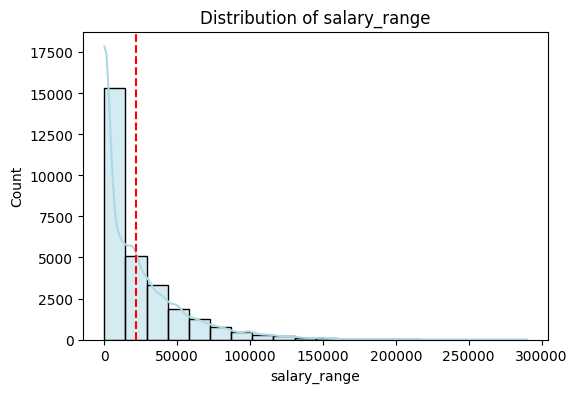

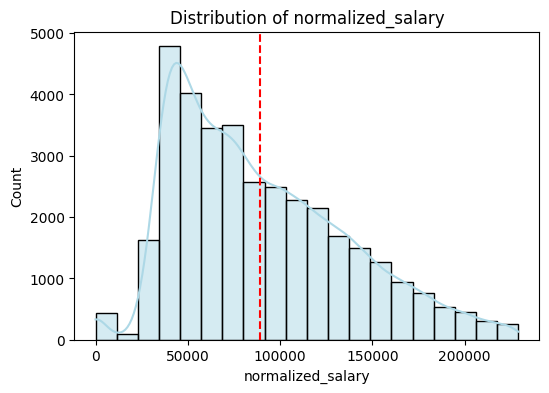

In [40]:

numeric_cols = data[["salary_range","normalized_salary"]]
for col in numeric_cols:
    plt.figure(figsize = (6,4))
    sns.histplot(x = data[col], bins = 20, kde = True, color = "lightblue")
    plt.axvline(data[col].mean(), color = "red", linestyle = "--", label = "Mean")
    plt.title(f"Distribution of {col}")
    plt.show


the distribution is completly right skewed (long tail on right, which is huge salary range) which says most of the values are low salary range(left)

In case of annual salary(normaliszed_salary), there may be a very few job postings with high salary package in case of annual salary(normaliszed_salary), most of the job postings seems to have low salary range

in case of views, almost the entire data seems to have very low values so the distribution of views and applies as a numerical values is not scientificaly sound

print the results

In [41]:
print("in case of annual salary(normaliszed_salary), there may be a very few job postings with high salary package")
print("in case of annual salary(normaliszed_salary), most of the job postings seems to have low salary range")
print("in case of views, almost the entire data seems to have very low values so the distribution of views and applies as a numerical values is not scientificaly sound")

in case of annual salary(normaliszed_salary), there may be a very few job postings with high salary package
in case of annual salary(normaliszed_salary), most of the job postings seems to have low salary range
in case of views, almost the entire data seems to have very low values so the distribution of views and applies as a numerical values is not scientificaly sound


Summary of the numeric distribution

Histograms were plotted for salary_range and normalized_salary.Both variables are strongly right skewed, meaning most job postings offer lower salary ranges, with only a few very high values.  
The views and applies columns also show heavy skew, with most jobs receiving low engagement. Because of this, analyzing them as raw numbers is not meaningful, and grouping them into categories is more appropriate.

2. **see distribution for categorical variables**

2.1. **grouping title to see the title distribution**

the title is been grouped to see what industry(grouped title in to single industries) seem to have higher job postings

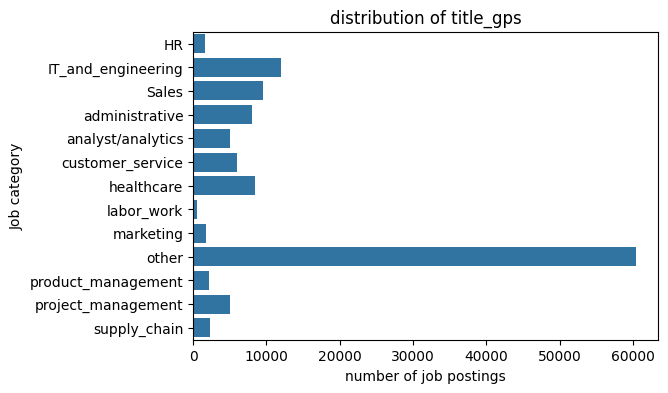

In [42]:

data["title"].head(30)
def gping_title(title):
    title = str(title).lower()
    if "sales" in title or "business development" in title:
        return "Sales"
    elif "customer" in title or "service" in title:
        return "customer_service"
    elif "project" in title or "program" in title:
        return "project_management"
    elif "admin" in title or "assistant" in title:
        return "administrative"
    elif "hr" in title or "human resource" in title:
        return "HR"
    elif "marketing" in title or "brand" in title:
        return "marketing"
    elif "operations" in title or "supply" in title:
        return "supply_chain"
    elif "engineer" in title or "developer" in title:
        return "IT_and_engineering"
    elif "pharmacy" in title or "nurse" in title or "medical" in title or "health" in title or "therapis" in title or "therapy" in title:
        return "healthcare"
    elif "labor" in title or "laborer" in title:
        return "labor_work"
    elif "product" in title or "product management" in title or "product manager" in title:
        return "product_management"
    elif "data" in title or "analyst" in title or "analysis" in title or "data management" in title:
        return "analyst/analytics"
    else:
        return "other"
data["title_gps"] = data["title"].apply(gping_title)
title_gp= data["title_gps"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=title_gp.values, y=title_gp.index)
plt.title("distribution of title_gps")
plt.xlabel("number of job postings")
plt.ylabel("Job category")
plt.show()

Result:

the graph shows, other jobs gets more higher number of job postings as expected, to get more insights about the popular job domains removing other would better, which will be done in later analysis

2.2. **work type distribution**

here formatted work type is categorized to see work type distributiom

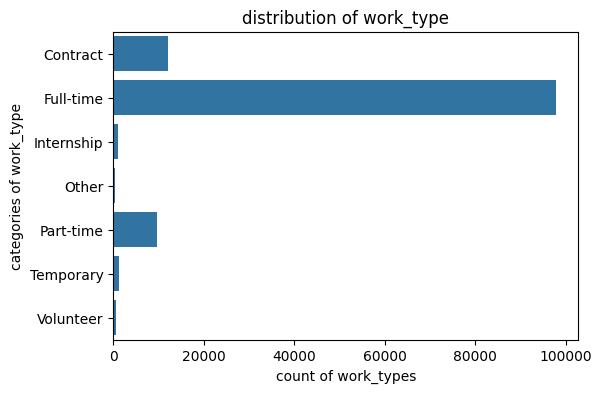

In [43]:
work_type = data["formatted_work_type"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=work_type.values, y=work_type.index)
plt.title("distribution of work_type")
plt.xlabel("count of work_types")
plt.ylabel("categories of work_type")
plt.show()

Result:

the plot shows, most of the job postings are full time jobs

3.3. **state wise distribution**

in this case values of each states from states_or_countries variable, is stored in state_counts and, from state_counts, 2 seperate columns is formed states and counts, these states and counts is then used to form treemap, to see state wise distribution. Tree map is much more suitable than bar chart or other charts to see t=distrubution cuz there are lot of states

In [44]:


states = data["states_or_countries"].astype("category").value_counts()
import plotly.express as px
state_counts = data["states_or_countries"].value_counts().reset_index()
state_counts.columns = ["state", "count"]

fig = px.treemap(
    state_counts,
    path =  ["state"],
    values = "count",
    color = "count",
    title = "job postings states"
)
fig.show()

Result:

the tree map shows most of the job posts are from California, second most is Texas

2.4. **salary package distribution**

salary package distribution (categorized as same as work type using astype("category") funtion to see the distribution of each salary package

/tmp/ipython-input-2880108831.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




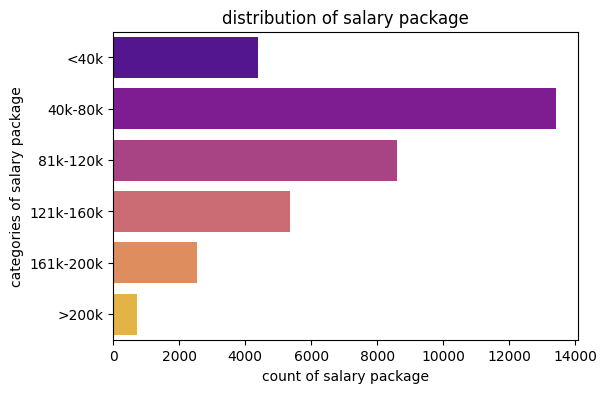

In [45]:
salary_pack = data["salary_package"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=salary_pack.values, y=salary_pack.index, palette="plasma")
plt.title("distribution of salary package")
plt.xlabel("count of salary package")
plt.ylabel("categories of salary package")
plt.show()

Result:

it seems that most of the jobs offer 40k-80k as salary package

2.5. **remote status distribution**

remote status distribution (categorized as same as work type using .astype("category") funtion to see the distribution of each remote status

/tmp/ipython-input-2521287483.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




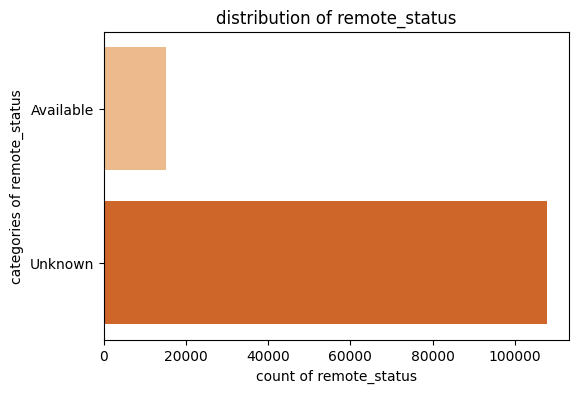

In [46]:


remote_status = data["remote_status"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=remote_status.values, y=remote_status.index, palette = "Oranges")
plt.title("distribution of remote_status")
plt.xlabel("count of remote_status")
plt.ylabel("categories of remote_status")
plt.show()


Result:

it seems that there are very few job posts contains information about the remote allowance details

2.6 **Views groups distribution**

views distribution (categorized as same as work type using .astype("category") funtion to see the distribution of each views gps

/tmp/ipython-input-2813024447.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




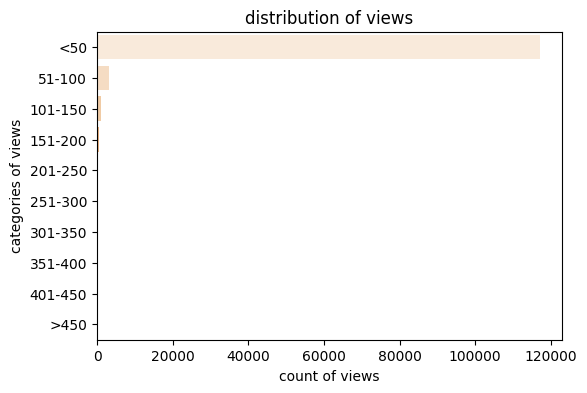

In [47]:
views_gps = data["views_gps"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=views_gps.values, y=views_gps.index, palette = "Oranges")
plt.title("distribution of views")
plt.xlabel("count of views")
plt.ylabel("categories of views")
plt.show()

Result:

it seems that most of views are less than 50 so this chart is unreliable.

Summary:

The dataset indicates that job postings are largely concentrated in IT & Engineering, Sales, Healthcare, and Administrative roles, with a sizable “Other” category reflecting diverse or uncategorized positions. Hiring activity is heavily centered in major U.S. employment hubs such as California, Texas, New York, Florida, North Carolina, and Illinois, with only limited international postings. Remote work availability is unclear for most roles due to missing data, though among known cases, fully remote jobs are relatively fewer. Salary ranges are predominantly mid-tier (40K–160K), while very high-paying roles above 200K are rare. Full time positions dominate, and experience levels are fairly balanced across entry, mid, and unknown categories. Finally, most job postings received fewer than 50 views, making engagement-based insights less reliable.

3. **Multivariate analysis**

3.1 **formatted_work_type, formatted_experience_level, views**

to see which experience level gets more views among the different work types

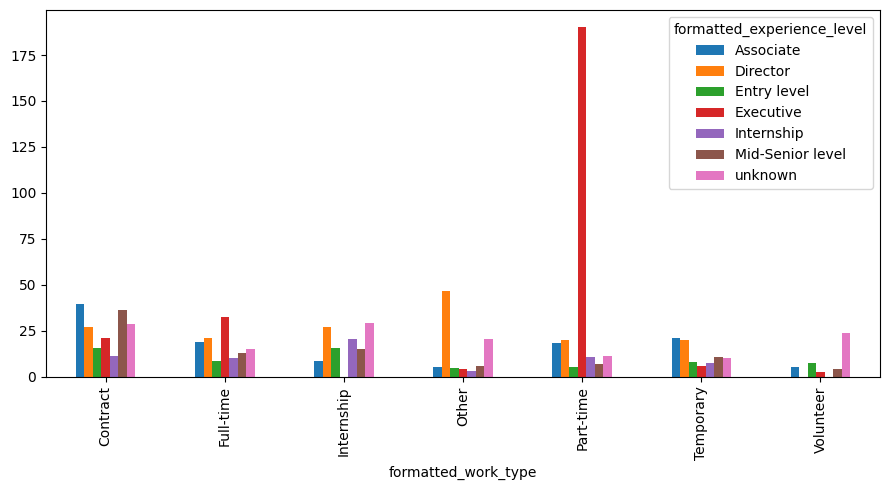

In [48]:
abc1 = data.groupby(["formatted_work_type", "formatted_experience_level"])["views"].mean().reset_index()
pivot_data = abc1.pivot(index="formatted_work_type", columns="formatted_experience_level", values = "views")
pivot_data.plot(kind= "bar",figsize = (9,5))
plt.tight_layout()
plt.show()

Result:

it shows that, how experience level interacts with work type to influence the number of job views.
Executive level part-time roles are in high demand, may be due to fewer postings

3.2 **formatted_work_type, formatted_experience_level, applies**

to see which experience level gets more job applications among the different work types

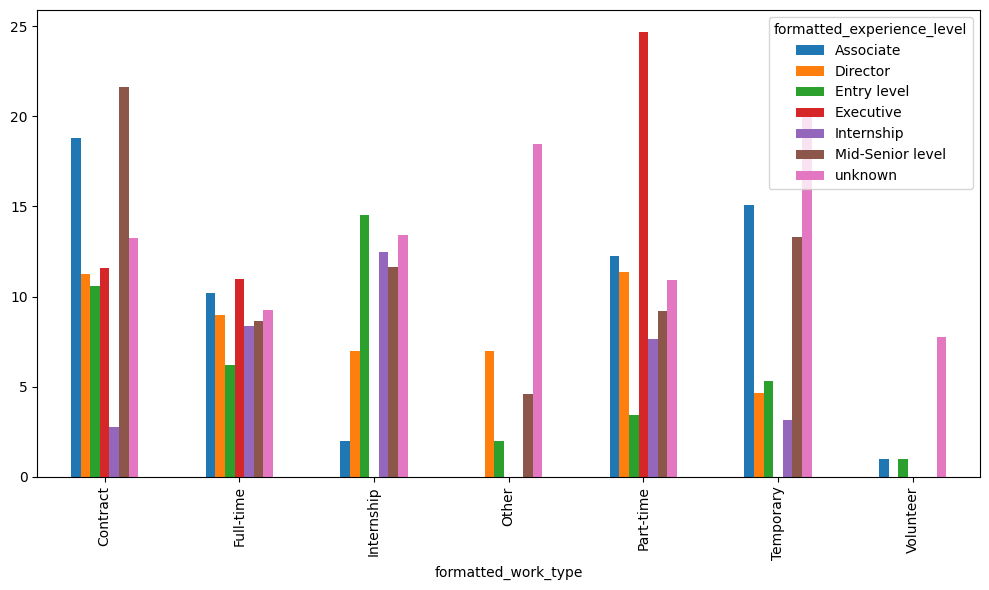

In [49]:
abc2 = data.groupby(["formatted_work_type", "formatted_experience_level"])["applies"].mean().reset_index()
pivot_data = abc2.pivot(index="formatted_work_type", columns="formatted_experience_level", values = "applies")
pivot_data.plot(kind= "bar",figsize = (10,6))
plt.tight_layout()
plt.show()

Result:

it shows that, how experience level interacts with work type to influence the number of job applications.
since executive part time roles getting higher views, the application volume is higher as expected

3.3 **formatted_work_type, month, views**

to see which experience level at what month gets more views

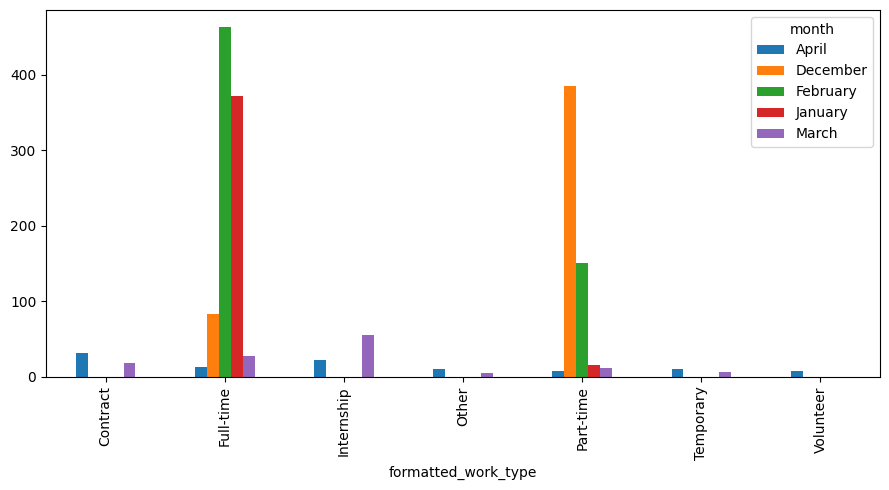

In [50]:
abc3 = data.groupby(["formatted_work_type", "month"])["views"].mean().reset_index()
pivot_data = abc3.pivot(index="formatted_work_type", columns="month", values = "views")
pivot_data.plot(kind= "bar",figsize = (9,5))
plt.tight_layout()
plt.show()

Result:

it shows that, the average number of job views received for each work type broken down by month.

Full time jobs receive the highest views, especially in February.

Part time roles also spike in December, may be due to increase in intl students

3.4 **formatted_work_type, month, applies**

to see which experience level at what month gets more applications

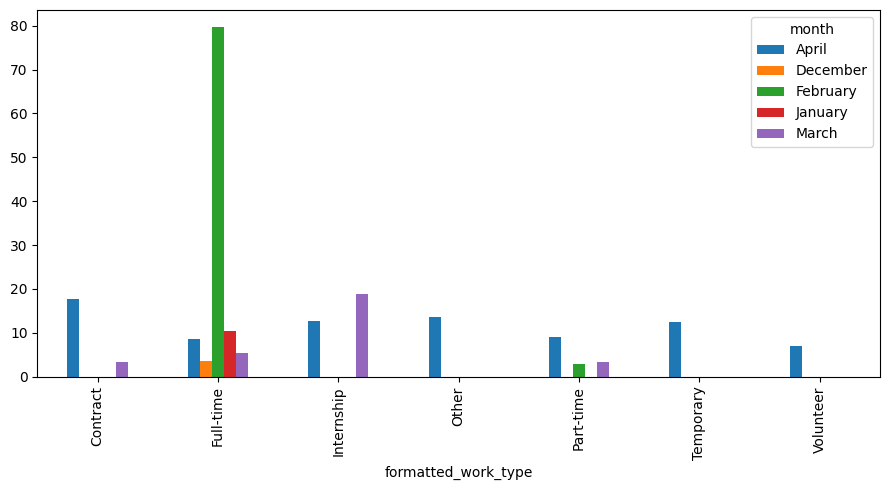

In [51]:
abc4 = data.groupby(["formatted_work_type", "month"])["applies"].mean().reset_index()
pivot_data = abc4.pivot(index="formatted_work_type", columns="month", values = "applies")
pivot_data.plot(kind= "bar",figsize = (9,5))
plt.tight_layout()
plt.show()


Result:

it shows that, the average number of job applications received for each work type broken down by month.

Full time jobs receive the highest views, especially in February, as expected, because it recieved more views

Summary:

To see how job visibility, attraction changes across different job types, experience level and months. The results showed that Executive level part time roles received high no. of applies, Full time jobs received the highest views, especially in  February.

#**Hypothesis testing**

#**HIRING EFFICIENCY**
has been broken down to several relevant metrics to find ou real insights behinf increasing the hiring efficiency:

#**hiring efficiency = no. of applicants / no. of views X no. of views / no. of job postings**

no. of applicants is based on how attractive is the post, what are all the factors that affect the attractiveness of the post to cause

**factors like salary disclosure/ salary package, salary range, pay period, job roles(titles), benifits job types, remote allowance**

#**ATTRACTIVENESS:**

#Attraction = No of applications (applies)/ no of impressions (views)

This metric explains how effectively the job posts convert viewers into applicants

Most of the Viewers, see the job post but converting them into applicants is quiet difficult. Therefore, the solution largely relies on how attractive the job post is, specifically, which factors that might influence the viewers to apply for the job.

#Factors that might affect the attraction:

1.	Salary disclosure (whether the job posts contains information about salary)
2.	Salary package ( eg. $40k-80k)
3.	Pay period (eg. Hourly, yearly…)
4.	Job roles or Titles (eg. Data analyst)
5.	Remote allowance (does the post contains the information regarding remote allowance)

#1. **does salary disclosure percent impacting the job application:**

first using def, a new function called salcomp is assigned to check NaNs in salary section

In [52]:
def salcomp(row):
    if (pd.isna(row["max_salary"]) and
        pd.isna(row["min_salary"]) and
        pd.isna(row["normalized_salary"])):
        return 0
    else:
        return 1

assigning salcomp function to new variable called "salary_disclosure"

In [53]:
data["salary_disclosure"] = data.apply(salcomp, axis = 1)

to see the proportion of salary_disclosure value_counts(normalize = True) is used

In [54]:
data["salary_disclosure"].value_counts(normalize = True)*100

,proportion
salary_disclosure,
0,71.471843
1,28.528157


salary_disclosure and applies distribution

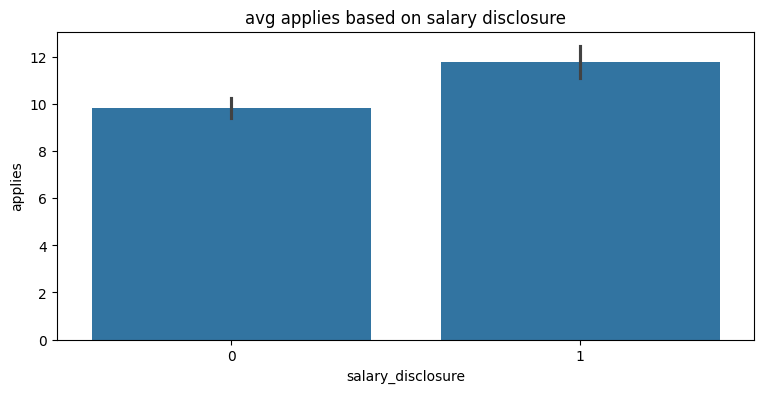

In [55]:
data.groupby("salary_disclosure")["applies"].describe()
plt.figure(figsize = (9,4))
sns.barplot(data = data, x= "salary_disclosure", y = "applies", estimator = "mean")
plt.title("avg applies based on salary disclosure")
plt.show()
#the plot shows that, when salay disclosure increases but is there an actual correlation between 2?

see the correlation between the "salary_disclosure" an "applies"

In [56]:
from scipy.stats import pearsonr, spearmanr
subset6 = data[["salary_disclosure", "applies"]].dropna()
stat,pvalue = spearmanr(subset6["salary_disclosure"], subset6["applies"])

Result:

it seems like there is almost weak positive correlation between "salary_disclosure" and "applies"

In [57]:
print(f"correlation coefficient: {stat}")
print(f"p-value: {pvalue}")
print("it seems like there is almost weak positive correlation between salary_disclosure and applies")

correlation coefficient: 0.056039890050419594
p-value: 1.6437843969305226e-17
it seems like there is almost weak positive correlation between salary_disclosure and applies


#2. **does low salary decreases the job applications?**

salary package vs applies

/tmp/ipython-input-1931601242.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



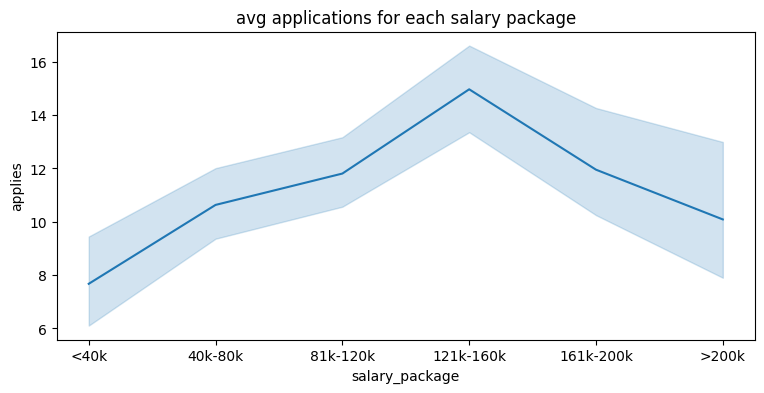

In [58]:
data.groupby("salary_package")["applies"].describe()
plt.figure(figsize = (9,4))
sns.lineplot(data = data, x= "salary_package", y = "applies", estimator = "mean")
plt.title("avg applications for each salary package")
plt.show()

In this line plot, it seems like there is relationship between these two gps
but higher the salary the application decreases, is it true?
to check that one way ANOVA nad spearman is performed

using oneway ANOVA (The one-way ANOVA tests the null
hypothesis that two or more groups have the same population mean).
This test is used here to see salary package and job application correlation

In [59]:
from scipy.stats import f_oneway
help(f_oneway)
sal_and_applies = [
    data.loc[data["salary_package"]==cat,"applies"].dropna()
        for cat in data["salary_package"].dropna().unique()]
fstat,pvalue = f_oneway(*sal_and_applies)

Help on function f_oneway in module scipy.stats._stats_py:

f_oneway(*samples, axis=0, equal_var=True, nan_policy='propagate', keepdims=False)
    Perform one-way ANOVA.

    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.

    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    equal_var: bool, option

Plot:

this says that there is a noticable difference between the salary packages and applications

In [60]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("this says that there is a noticable difference between the salary packages and applications")

f-statistic: 5.373534623248235
p-value: 6.155178279000531e-05
this says that there is a noticable difference between the salary packages and applications


checking whether increase or decrease in salary affect job application

In [61]:
data["salary_package_code"] = data["salary_package"].cat.codes
subset = data[["salary_package_code", "applies"]].dropna()
stat, pval = spearmanr(subset["salary_package_code"], subset["applies"])

Result:

it seems like  there is no positive correlation beween salary package and applies so after seeing the results of ANOVA and spearman, it seems like salary package and applies are correlated (according to ANOVA) but increasing or decreasing of salary doesn't affect the job applications

In [62]:
print(f"correlation coefficient: {stat}")
print(f"pvalue: {pvalue}")
print("it seems like  there is no positive correlation beween salary package and applies")
print("after seeing the results of ANOVA and spearman, it seems like salary package and applies are correlated (according to ANOVA)but increasing or decreasing of salary doesn't affect the job applications")

correlation coefficient: 0.07135114539876203
pvalue: 6.155178279000531e-05
it seems like  there is no positive correlation beween salary package and applies
after seeing the results of ANOVA and spearman, it seems like salary package and applies are correlated (according to ANOVA)but increasing or decreasing of salary doesn't affect the job applications


#3. **does pay period affect job applications**

it seems weekly, bi weekly has very low value so monthly, biweekly, weekly were
labled as other, easier for analysis

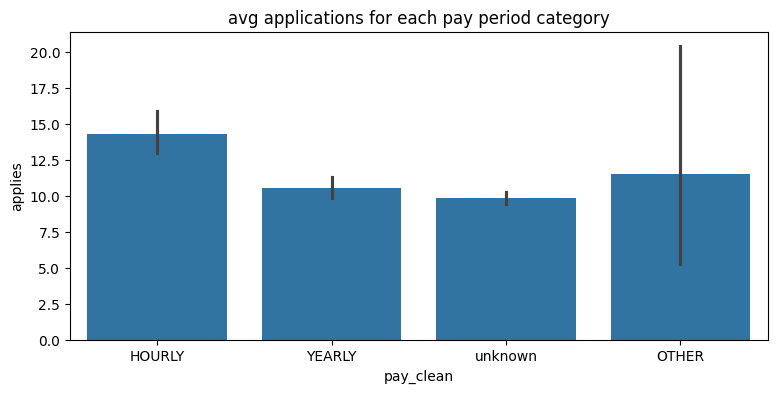

In [63]:
data["pay_clean"] = data["pay_period"].replace({
    "MONTHLY": "OTHER",
    "WEEKLY": "OTHER",
    "BIWEEKLY": "OTHER"})
data.groupby("pay_clean")["applies"].describe()
plt.figure(figsize = (9,4))
sns.barplot(data = data, x= "pay_clean", y = "applies", estimator = "mean")
plt.title("avg applications for each pay period category")
plt.show()


Plot:

this bar plot shows hourly has hourly payment recieves high job application,
to check that, ANOVA has been performed, because pay period is a nominal data there is no order

checking whether pay period affect job application

In [64]:
pay_and_applies = [
    data.loc[data["pay_clean"]==cat,"applies"].dropna()
        for cat in data["pay_clean"].dropna().unique()]
fstat, pvalue = f_oneway(*pay_and_applies)

Result:

this shows that pay_period might have correlation between pay_period and applies and statisticaly significant

In [65]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("this shows that pay_period might have correlation between pay_period and applies and statisticaly significant")

f-statistic: 18.671168767745254
p-value: 4.312212848625937e-12
this shows that pay_period might have correlation between pay_period and applies and statisticaly significant


#4. **is there any job roles in demand?**

it seems like removing other gives better insights on some of the popular and well know jobs

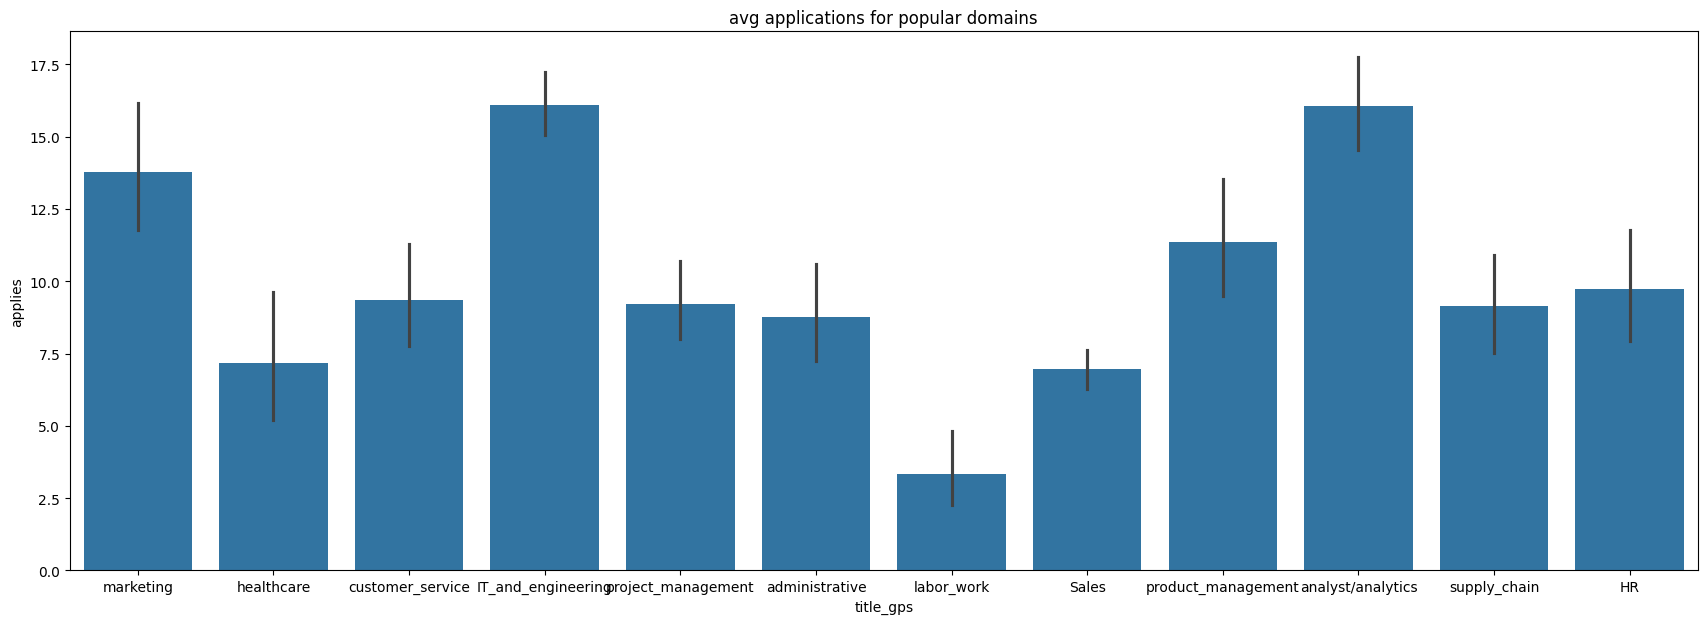

In [66]:
data2 = data[data["title_gps"]!="other"]
title_gp2= data2["title_gps"].astype("category").value_counts()
plt.figure(figsize = (21,7))
sns.barplot(data = data2, x= "title_gps", y = "applies", estimator = "mean")
plt.title("avg applications for popular domains")
plt.show()

Plot:

the graph shows that, IT and engineering, analysts and analytics jobs getting high job applications among others, is it true?

to check that, ANOVA is used because, it has more than 2 variables and it is not an ordinal value

In [67]:
titl_and_applies = [
    data2.loc[data2["title_gps"] == cat, "applies"].dropna()
    for cat in data2["title_gps"].unique()
]
fstat, pvalue = f_oneway(*titl_and_applies)

Result:

it is highly significant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in application which means that, it is highly correlated with applies.

In [68]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highly significant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in application which means that, it is highly correlated with applies")

f-statistic: 18.90798074430565
p-value: 3.2723231592739543e-38
it is highly significant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in application which means that, it is highly correlated with applies


#5. **does remote allowance affect applications**

/tmp/ipython-input-2471422241.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




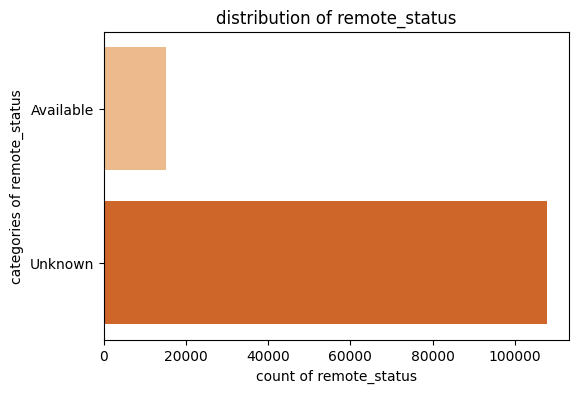

In [69]:
remote_status = data["remote_status"].astype("category").value_counts()
plt.figure(figsize = (6,4))
sns.barplot(x=remote_status.values, y=remote_status.index, palette = "Oranges")
plt.title("distribution of remote_status")
plt.xlabel("count of remote_status")
plt.ylabel("categories of remote_status")
plt.show()

Plot:

the plot shows that there are very few post that mentoned remote allowance in the post.

In [70]:
data["remote_status_num"] = data["remote_status"].replace({
    "Available": 1,
    "Unknown": 0})
subset8 = data[["remote_status_num", "applies"]].dropna()
stat, pvalu =spearmanr(subset8["remote_status_num"], subset8["applies"])

/tmp/ipython-input-318351912.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Result:

remote allowance has weak positive correlation towards job applications(applies)

In [71]:
print(f"correlation coefficient: {stat}")
print(f"p-value: {pvalue}")
print("remote allowance has weak positive correlation towards job applications(applies)")

correlation coefficient: 0.2599660271605278
p-value: 3.2723231592739543e-38
remote allowance has weak positive correlation towards job applications(applies)


#**NOW ANALYSING NO. OF IMPRESSIONS**

no. of impressions is based on how vissiblle the post is, what are all the factors that affect the visibility of the post to cause

#**VISIBILITY:**

#Visibility = no of impressions (views)/ no. of job postings

This metrics explains how many people does the the post reaches.

Finding out whether the job post is reaching the candidates is as vital as attraction of the post. There are factors that might influence the candidates to take a look at the job post

#Factors that might affect the visibility of the post:

1.	Job roles or Titles
2.	Location (job location details)
3.	Time (time when the recruiters post about the job)  
4.	Work type (eg. Contract, full time, part time)
5.	Company (eg. Amazon, Microsoft)


#1. **Is there specific job roles(among the popular job domains) gets more views**

removing other from the title gps to find the popular job domains

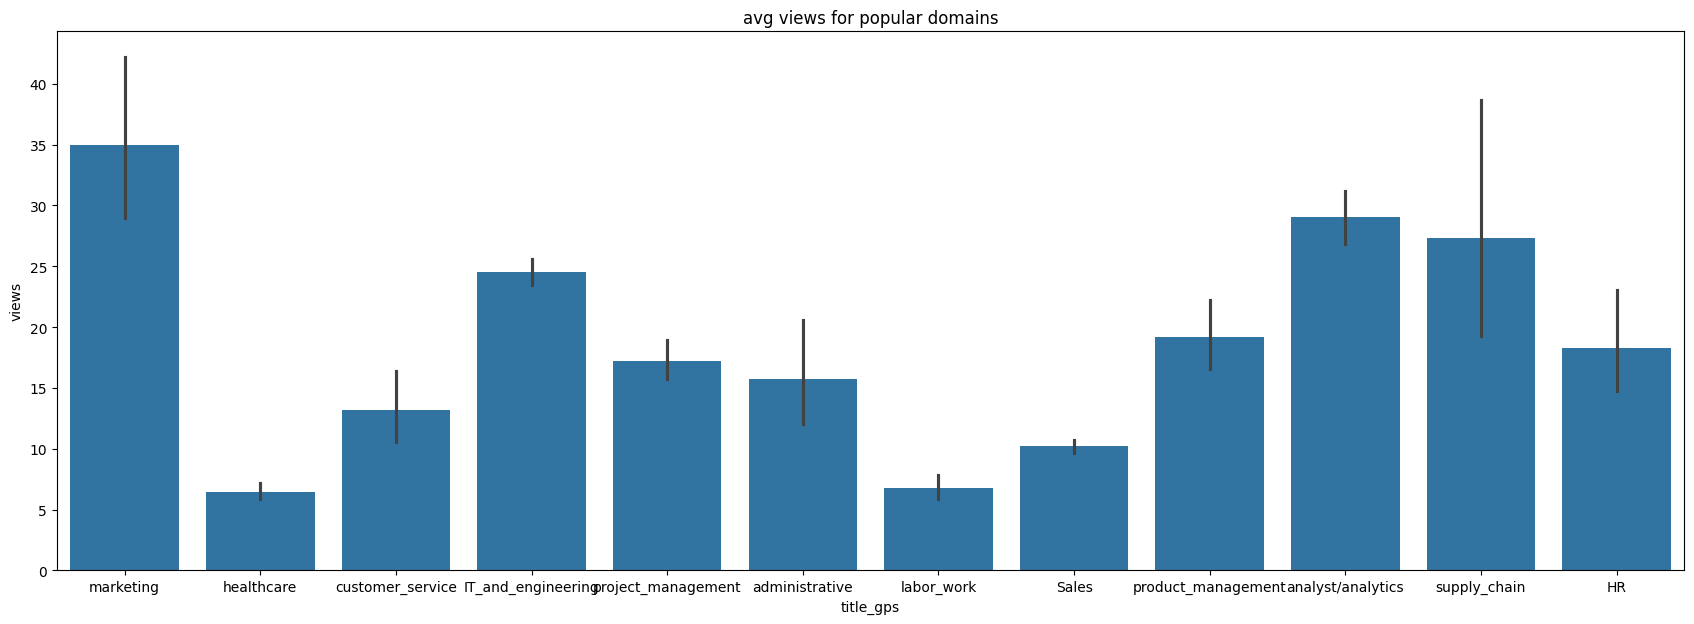

In [72]:
data2 = data[data["title_gps"]!="other"]
plt.figure(figsize = (21,7))
sns.barplot(data = data2, x= "title_gps", y = "views", estimator = "mean")
plt.title("avg views for popular domains")
plt.show()


Plot:

the graph shows that,among the popular domains shown that, marketing domain received more views than others is it true?

ANOVA is used because, it has more than 2 variables and it is not an ordinal value

In [73]:
titl_and_views = [
    data2.loc[data2["title_gps"] == cat, "views"].dropna()
    for cat in data2["title_gps"].unique()
]
fstat, pvalue = f_oneway(*titl_and_views)

Result:

it is highly significant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in views or impression which means that, it is highly correlated with views.

In [74]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highlysignificant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in views or impression which means that, it is highly correlated with views")

f-statistic: 32.516046165296984
p-value: 9.343180449492782e-70
it is highlysignificant tat the popular jobs (like sales, IT, analyst, etc..) has major impact in views or impression which means that, it is highly correlated with views


#2. **certain locations where job roles in demand.**

In [75]:
st_vi = data.groupby(["states_or_countries","views"]).size().reset_index(name = "total_views")
#remove the 0 views
st_vi = st_vi[st_vi["total_views"]>0]
if len(st_vi)>0:
    fig = px.treemap(
    st_vi,
    path = ["states_or_countries"],
    values = "total_views",
    color = "total_views",
    title = "state wise views")
    fig.show()
else:
    print("not_avail")


Plot:

this treemap shows the views change according to the state using ANOVA to test if this is true or not

filtering states with more than 2 values

In [76]:
state_counts = data["states_or_countries"].value_counts()
valid_states = state_counts[state_counts >= 2].index
data_valid = data[data["states_or_countries"].isin(valid_states)]

state_and_views = [
    data_valid.loc[data_valid["states_or_countries"] == cat, "views"].dropna()
    for cat in valid_states
]

Result:

In [77]:
fstat, pvalue =f_oneway(*state_and_views)
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highly significant tat the there is high corelation between states and views")

f-statistic: 28.95245840149736
p-value: 0.0
it is highly significant tat the there is high corelation between states and views


#3. **certain months where applicants actively look for job**

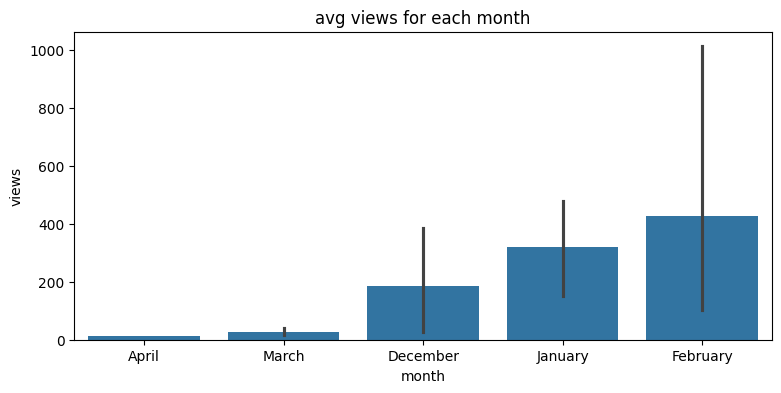

In [78]:
data.groupby("month")["views"].describe()
plt.figure(figsize = (9,4))
sns.barplot(data = data, x= "month", y = "views", estimator = "mean")
plt.title("avg views for each month")
plt.show()

Plot:

this plot shows that february month is when applicants actively look for job using ANOVA to test if this is true or not

In [79]:
month_and_views = [
    data.loc[data["month"] == cat, "views"].dropna()
    for cat in data["month"].unique()
]
fstat, pvalue= f_oneway(*month_and_views)

Result:

it is highly significant that month is highly correlated with views

In [80]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highly significant that month is highly correlated with views")

f-statistic: 90.00511844607621
p-value: 1.5608284163240397e-76
it is highly significant that month is highly correlated with views


#4. **certain seasons where applicants actively look for job**

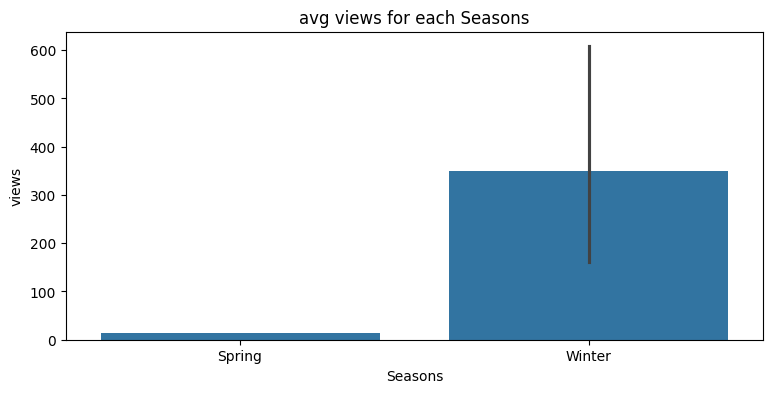

In [81]:
data.groupby("Seasons")["views"].describe()
plt.figure(figsize = (9,4))
sns.barplot(data = data, x= "Seasons", y = "views", estimator = "mean")
plt.title("avg views for each Seasons")
plt.show()


Plot:

this plot shows that winter season is when applicants actively look for job

using ANOVA to test if this is true or not

In [82]:
Seasons_and_views = [
    data.loc[data["Seasons"] == cat, "views"].dropna()
    for cat in data["Seasons"].unique()
]
fstat, pvalue= f_oneway(*Seasons_and_views)

Result:

it is highly significant that Seasons is highly correlated with views

In [83]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highly significant that Seasons is highly correlated with views")

f-statistic: 304.177494118481
p-value: 4.89617098730155e-68
it is highly significant that Seasons is highly correlated with views


#5. **does work type influence the impressions**

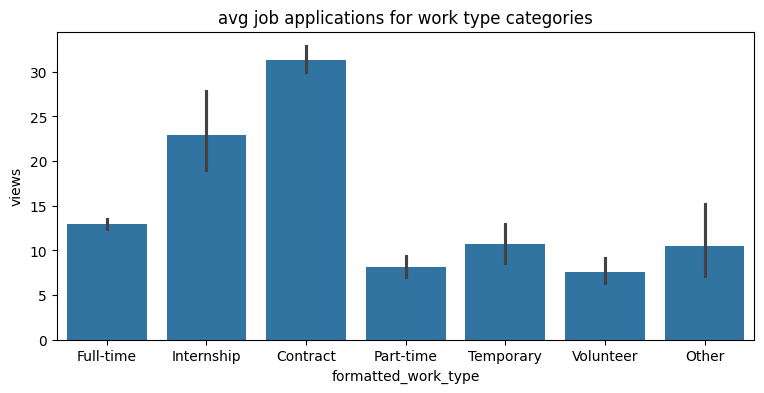

In [84]:
data.groupby("formatted_work_type")["views"].describe()
plt.figure(figsize = (9,4))
sns.barplot(data = data, x= "formatted_work_type", y = "views", estimator = "mean")
plt.title("avg job applications for work type categories")
plt.show()


Plot:

this plot shows that contract basis jobs are popular among applicants whom are actively look for job

using ANOVA to test if this is true or not

In [85]:
wt_and_views = [
    data.loc[data["formatted_work_type"] == cat, "views"].dropna()
    for cat in data["formatted_work_type"].unique()
]
fstat, pvalue = f_oneway(*wt_and_views)

Result:

it is highly significant that work type is highly correlated with views

In [86]:
print(f"f-statistic: {fstat}")
print(f"p-value: {pvalue}")
print("it is highly significant that work type is highly correlated with views")

f-statistic: 99.24367261023248
p-value: 4.517437352271182e-125
it is highly significant that work type is highly correlated with views


#6. **which company gets more views but less applies**

aggregation of views and applies is done using agg function

In [87]:
comp = data.groupby("company_name").agg({
    "views":"mean",
    "applies":"mean"}).reset_index()




by subtracting  the vews - applies, we get the gap between views and applies

In [88]:
comp["view_apply_gap"] = comp["views"] - comp["applies"]
comp.sort_values("view_apply_gap",ascending = False).head(20)

,company_name,views,applies,view_apply_gap
1964,Athos Private Wealth,8062.000000,43.0,8019.000000
16514,Prelude,5518.000000,15.0,5503.000000
20520,Tarte Cosmetics,4378.000000,472.0,3906.000000
21687,TradeLink Solutions Company,3798.000000,5.0,3793.000000
24097,fpSOLUTIONS CEO,3538.000000,39.0,3499.000000
12596,Los Angeles Dodgers,2636.000000,24.0,2612.000000
3388,Burton Energy Group,2490.000000,27.0,2463.000000
17151,RMI,2481.500000,95.0,2386.500000
15244,One Step Software,2254.000000,31.0,2223.000000
6519,Dôen,2114.000000,19.5,2094.500000


the apply gap is then categorized into four parts using qcut()

In [89]:
comp["category"] = pd.qcut(comp["view_apply_gap"], q=4, labels = ["excellent", "good", "poor","very_poor"])

performing spearman test since its ordinal datas

In [90]:
subset9 = comp[["views", "applies"]].dropna()
stat, pvalue = spearmanr(subset9["views"], subset9["applies"])

Result:


it significant that, company that gets more views, get more applications and vice versa is true.

In [91]:
print(f"correlation coefficient: {stat}")
print(f"p-value: {pvalue}")
print(" it significant that, company that gets more views, get more applications and vice versa is true")

correlation coefficient: 0.7617620857220979
p-value: 0.0
 it significant that, company that gets more views, get more applications and vice versa is true


#**TIME INFLUENCE**

Few other factors like Time duration of the post might affect the applications and visibility of the post.
Eg. How long the post has been active?


#1. **posting duration impact in impression of the post**

post duration days means no. of days the post was there in linkedin
it is derived using the post expiry time and posted time

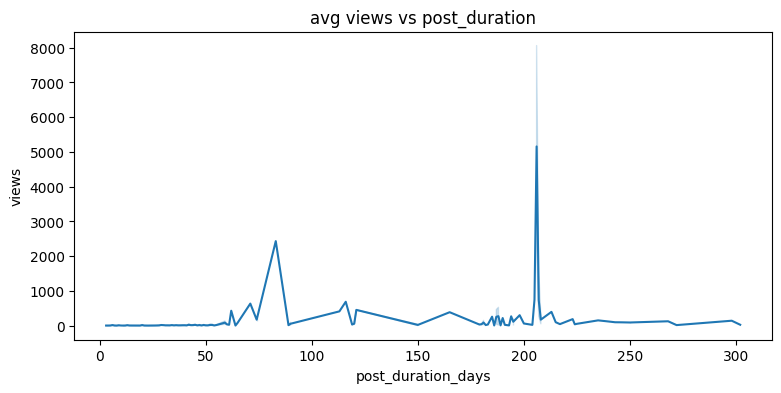

In [92]:
data["post_duration_days"] = (data["expiry"]-data["original_listed_time"]).dt.days
data["post_duration_days"].head(20)

data.groupby("post_duration_days")["views"].describe()
plt.figure(figsize = (9,4))
sns.lineplot(data = data, x= "post_duration_days", y = "views", estimator = "mean")
plt.title("avg views vs post_duration")
plt.show()

Plot:

the graph shows that, there's been a fluctuation in views, it means it is not clear that increase in duration of post, to check whether it is true, spearman test is performed

correlation check:

In [93]:
subset10 = data[["post_duration_days", "views"]].dropna()
stat, pvalue = spearmanr(subset10["post_duration_days"], subset10["views"])

Result:

it is significant that, there is a weak positive correlation between duration of the post and views

In [94]:
print(f"correlation coefficient: {stat}")
print(f"p-value: {pvalue}")
print("it is significant that, there is a weak positive correlation between duration of the post and views")

correlation coefficient: 0.11027676236015176
p-value: 0.0
it is significant that, there is a weak positive correlation between duration of the post and views


#2.  **posting duration impact in application of the post**

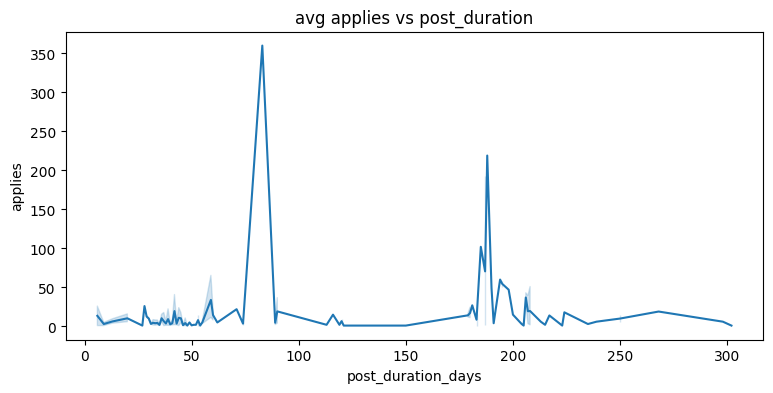

In [95]:
data.groupby("post_duration_days")["applies"].describe()
plt.figure(figsize = (9,4))
sns.lineplot(data = data, x= "post_duration_days", y = "applies", estimator = "mean")
plt.title("avg applies vs post_duration")
plt.show()

Plot:

the graph shows that, there's been a fluctuation in application, it means it is not clear that increase in duration of post, to check whether it is true, spearman test is performed

correlation check:

In [96]:
subset11 = data[["post_duration_days", "applies"]].dropna()
stat, pvalue= spearmanr(subset11["post_duration_days"], subset11["applies"])

Result:

it is significant that, there is very weak negative correlation between duration of the post and application

In [97]:
print(f"correlation coefficient: {stat}")
print(f"p-value: {pvalue}")
print("it is significant that, there is very weak negative correlation between duration of the post and application")

correlation coefficient: -0.01724797761461239
p-value: 0.008809455720279595
it is significant that, there is very weak negative correlation between duration of the post and application


#**CONCLUSION**

This project contains analysis of linkedin dateset which contains more than 120,000 job postings to provide insights to the recruiters regarding improving the hiring efficiency by analysing VISIBILITY (views), ATTRACTION (applications), and characteristics such as salary, work type, experience level, and geography. After performing data cleaning, data preprocesing, EDA, and statistical testing, provided lots of meaningful buisness insights.

#**Findings**
1. Salary disclosure has only a weak positive impact on applications. Revealing salary does not significantly increase applicant behavior.
2. Pay period (hourly vs. monthly) shows some impact hourly jobs receive more applications, likely due to industry-specific demand.
3. Job roles matters: IT & Engineering, Analyst/Analytics, Sales, and Healthcare roles receive significantly more applications compared to others.
4. Remote allowance does not strongly influence applications, meaning remote availability alone is not responsible for of applicant behavior.
5. Job titles strongly impact impressions, Marketing, IT, and Analyst roles receive more views.
6. Location matters: States like CA, TX, and NY receive significantly more views than others, showing strong regional hiring activity.
7. Month and Season influence visibility: February and Winter show the highest job-seeker activity.
8. Work type affects visibility: Internship and Contract roles attract higher views, suggesting that early-career and flexible opportunities drive more browsing behavior.
9. Post duration (days active) has only a weak correlation with views and applies. A longer posting does not guarantee more visibility or more applications.

#**Business Recommendations**
Based on the insights, here are practical and actionable recommendations for hiring teams:

1.	Improve Visibility in Low-View States: Since a handful of states dominate impressions (CA, TX, NY), employers in low-visibility states should, Increase job ads in there.
2.	post more jobs related to It and engineering, analysts/ analytics, because these Job titles heavily influence both views and applications.
3.	Salary Disclosure alone won’t influence applications: Since salary disclosure has only has weak effect, companies may or may not need to mention the salary in the job posts
4.	Posting Strategy with job seeker timing: Views spike during February/Winter
Season. Post more jobs during that time, Avoid relying heavily on slow months for hiring
5.	Optimize job posts based on work type Internship and Contract roles receive high visibility. companies can promote these roles more aggressively, Advertise multiple opportunities related to that
6.	Monitor Low Performer Job Categories: Some job categories receive significantly fewer applications and views. Companies should, Reassess job description clarity, Improve job title specificity
